In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\samue\Downloads\new_data.csv.zip')
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   event_time     object 
 2   event_type     object 
 3   product_id     int64  
 4   category_id    int64  
 5   category_code  object 
 6   brand          object 
 7   price          float64
 8   user_id        int64  
 9   user_session   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 762.9+ MB


In [6]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [7]:
df['category_code'].unique()

array(['electronics.smartphone', 'appliances.sewing_machine', nan,
       'appliances.kitchen.washer', 'computers.notebook',
       'furniture.living_room.sofa', 'appliances.kitchen.refrigerators',
       'furniture.kitchen.chair', 'appliances.kitchen.dishwasher',
       'electronics.audio.headphone', 'appliances.environment.vacuum',
       'appliances.environment.water_heater', 'electronics.camera.video',
       'electronics.clocks', 'electronics.video.tv', 'apparel.tshirt',
       'apparel.jeans', 'construction.tools.drill',
       'auto.accessories.compressor', 'computers.components.motherboard',
       'computers.peripherals.printer', 'computers.desktop',
       'auto.accessories.player', 'accessories.bag',
       'computers.components.videocards', 'furniture.bedroom.bed',
       'furniture.bathroom.bath', 'electronics.audio.subwoofer',
       'construction.tools.welding', 'construction.tools.saw',
       'furniture.kitchen.table', 'apparel.shoes',
       'construction.tools.light'

In [8]:
df_product_id = df.groupby(['event_type','category_code'], as_index='False')['product_id'].count()
df_product_id.head()

event_type  category_code                         
cart        accessories.bag                             48
            apparel.shoes.keds                           2
            appliances.environment.air_conditioner       4
            appliances.environment.air_heater          249
            appliances.environment.vacuum             1527
Name: product_id, dtype: int64

In [5]:
df_category = df['category_code'].str.split(".", expand=True)


In [6]:
df_category.head()

,0,1,2,3
0,electronics,smartphone,None,None
1,appliances,sewing_machine,None,None
2,NaN,NaN,NaN,NaN
3,appliances,kitchen,washer,None
4,electronics,smartphone,None,None


In [8]:
df_split = pd.merge(df, df_category, left_index=True, right_index=True)
df_split.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,0,1,2,3
0,0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,electronics,smartphone,None,None
1,1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,appliances,sewing_machine,None,None
2,2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,NaN,NaN,NaN,NaN
3,3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,appliances,kitchen,washer,None
4,4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,electronics,smartphone,None,None


In [14]:
df_split.dropna(subset=['category_code'], inplace=True)

In [22]:
df_split.rename(columns={0:'Cat1',1:'Cat2',2:'Cat3',3:'Cat4'}, inplace=True)

In [23]:
df_split.columns

Index(['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'Cat1',
       'Cat2', 'Cat3', 'Cat4'],
      dtype='object')

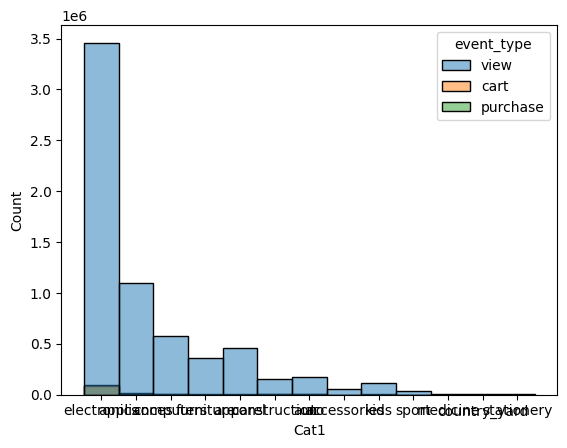

In [27]:
sns.histplot(df_split, x='Cat1', hue='event_type')
plt.show()